In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('../../../../data/titanic_train.csv')

print(df['Survived'].mean())

print(df[df['Survived'] == 1].mean())

print(df[df['Survived'] == 1]['Fare'].mean())

print(df[(df['Survived'] == 0) & (df['Pclass'] == 3)]['Fare'].max())

df.head()

0.3838383838383838
PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.343690
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64
48.39540760233917
69.55


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.loc[0:5, 'Survived':'Sex']

df.iloc[0:5, 0:5]

df[-1:]

col = ['Pclass', 'Sex', 'Fare']
df.groupby(by = ['Survived'])[col].describe(percentiles=[])

df.groupby(by = ['Survived'])[col].agg([np.mean, np.std, np.min, np.max])

Pclass                           Fare                          
              mean       std amin amax       mean        std amin      amax
Survived                                                                   
0         2.531876  0.735805    1    3  22.117887  31.388207  0.0  263.0000
1         1.950292  0.863321    1    3  48.395408  66.596998  0.0  512.3292

In [3]:
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [4]:
pd.crosstab(df['Survived'], df['Sex'], normalize=True)

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [6]:
df.pivot_table(['Age', 'Fare'], ['Survived'], aggfunc='mean').head()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


In [4]:
sum_fare_age = df['Fare'] + df['Age']
df.insert(loc = len(df.columns), column = 'fare_age', value = sum_fare_age)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,29.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,109.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,33.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,88.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,43.0500


In [8]:
df = df.drop(['fare_age'], axis=1)

df.drop([1, 2]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [9]:
pd.crosstab(df['Survived'], df['Pclass'], margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


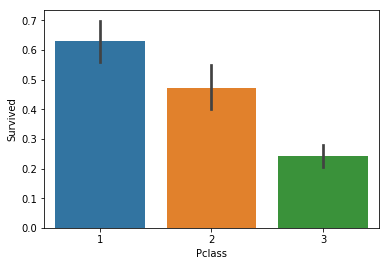

In [10]:
sns.barplot(y="Survived", x="Pclass", data=df)
#На данном графике мы видем, с какой вероятностью выжил пассажир каждого класса. 
#Наибольший процент выживших в первом классе

In [11]:
pd.crosstab(df['Survived'], df['Sex'], margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


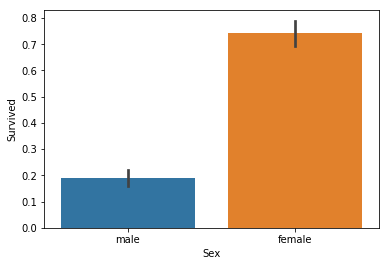

In [69]:
sns.barplot(y="Survived", x="Sex", data=df)
#На данном графике мы видим, что женщины выжили с большей вероятностью, чем мужчины

In [71]:
df['WorthClass'] = (df['Pclass'] == 3).astype('int')
pd.crosstab(df['Survived'], df['WorthClass'], margins=True)

WorthClass,0,1,All
Survived,,,
False,177,372,549
True,223,119,342
All,400,491,891


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


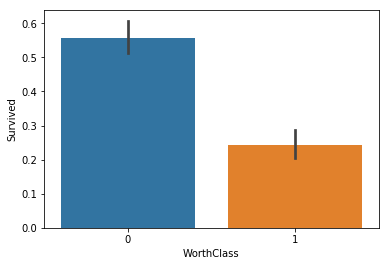

In [14]:
sns.barplot(y="Survived", x="WorthClass", data=df)
# Здесь мы видим, что пассажиры в классах 2 и 3 (WorthClass==1) выживают с наименьшей вероятностью 

In [15]:
pd.crosstab(df['WorthClass'] & df['Sex'], df['Survived'])

Survived,0,1
row_0,,
False,177,223
True,372,119


In [38]:
df.head()

print(df.shape)
print(df.info())
df['Survived'] = df['Survived'].map({0: False, 1: True})

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


False    549
True     342
Name: Survived, dtype: int64


Text(0.5,1,'Распределение выживших')

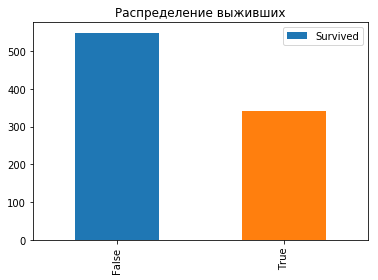

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
print(df['Survived'].value_counts())

df['Survived'].value_counts().plot(kind = 'bar', label = 'Survived')
plt.legend()
plt.title('Распределение выживших')
# Здесь показано, сколько человек выжило, а сколько нет

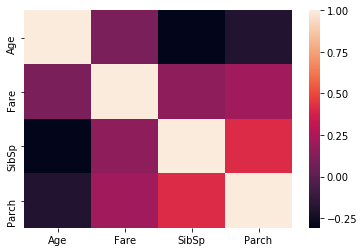

In [76]:
corr_matrix = df[['Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(corr_matrix)
# Наиболее коррелируемые признаки - Parch и SibSb

Распределение количественных признаков


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002698C1F7978>,
      dtype=object)

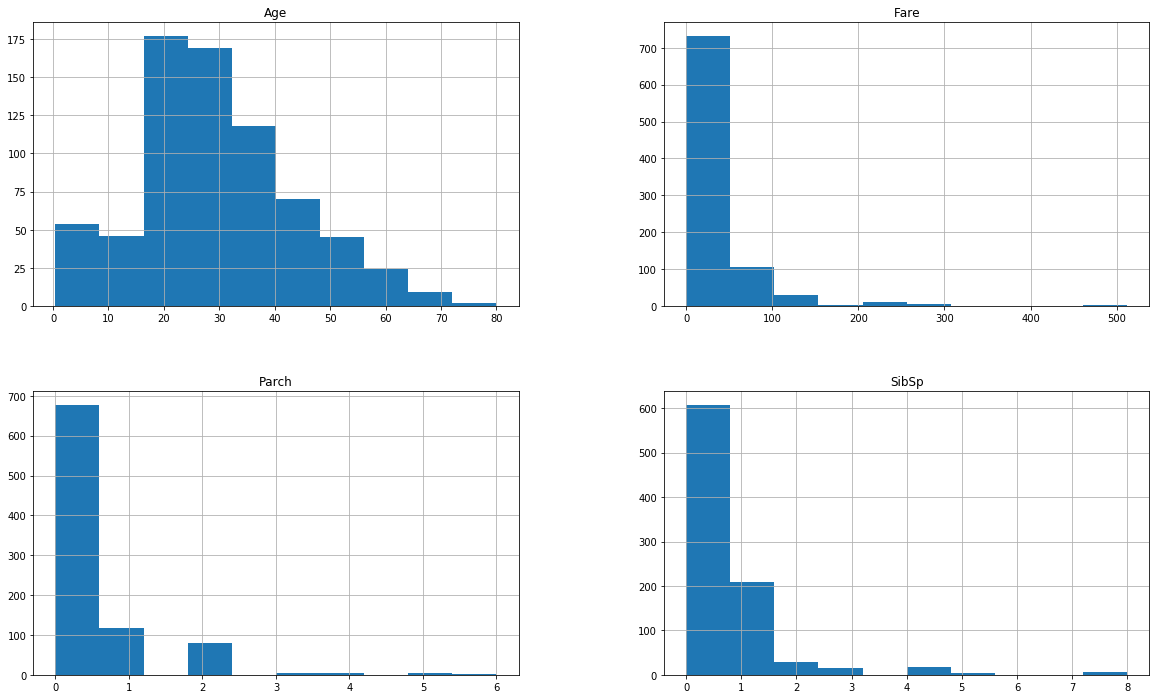

In [82]:
print('Распределение количественных признаков')
features = ['Age', 'Fare', 'SibSp', 'Parch']
df[features].hist(figsize=(20,12))
# Наибольшее количество пассажиров в возрасте 30 лет
# Большая часть билетов стоила менее 60 долларов
# 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

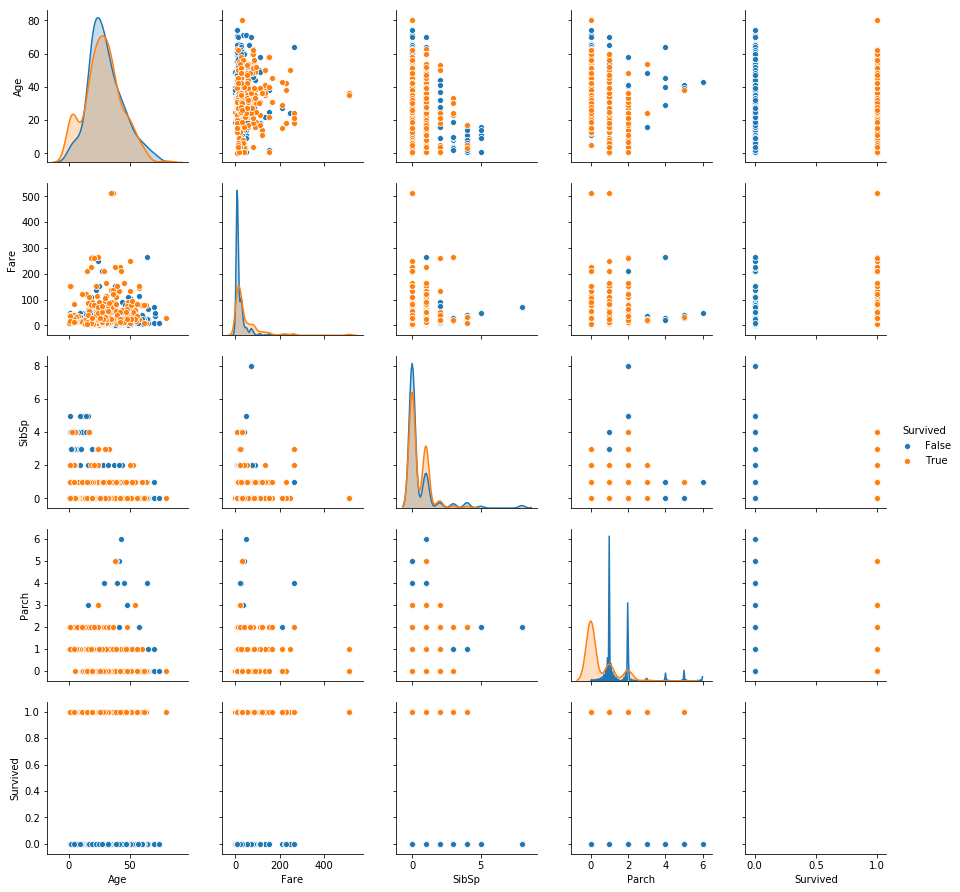

In [85]:
sns.pairplot(df[features + ['Survived']], hue = 'Survived')

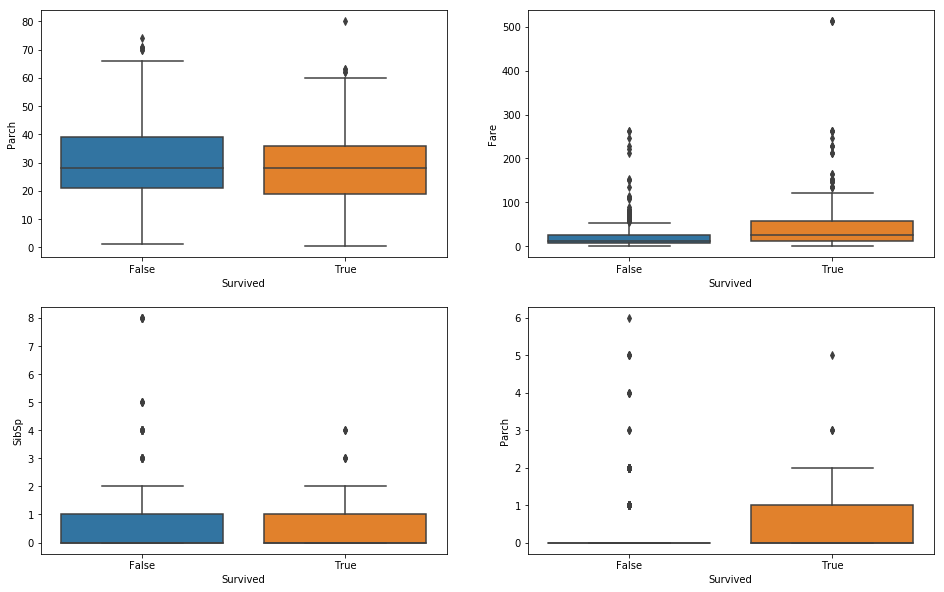

In [86]:
import math
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
for idx, feat in enumerate(features):
    a = math.floor(idx / 2)
    sns.boxplot(x = 'Survived', y = feat, data = df, ax = axes[a, idx%2])
    axes[row, col].set_xlabel('Survived')
    axes[row, col].set_ylabel(feat)
    
# У людей с родителями на борту больший шанс выжить
# У людеу с более дорогими билетами больший шанс выжить
# У молодых шанс выжить больше

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


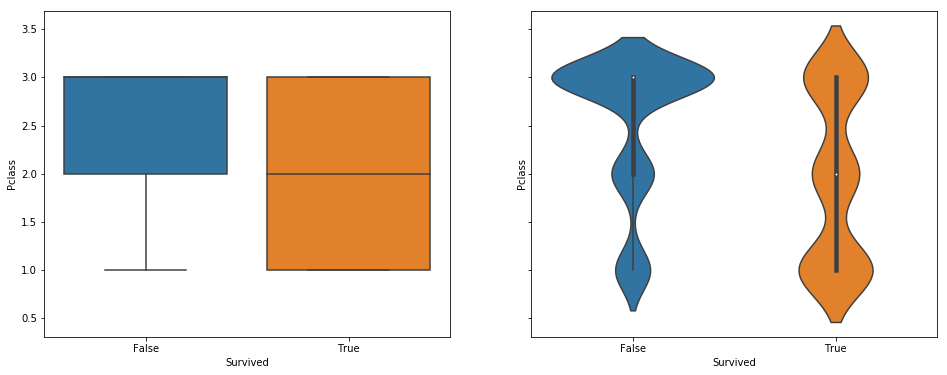

In [40]:
_, axes = plt.subplots(1, 2, sharey = True, figsize=(16,6))

sns.boxplot(x="Survived", y='Pclass', data = df, ax = axes[0])
sns.violinplot(x='Survived', y='Pclass', data = df, ax = axes[1])

# здесь мы видим зависимость количества выживших в зависимости от класса билета

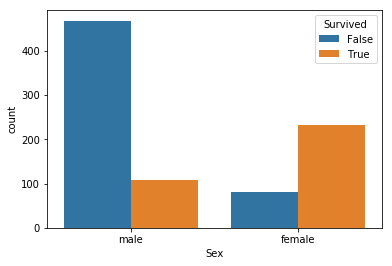

In [44]:
sns.countplot(x = 'Sex', hue='Survived', data = df)
# Здесь видно сколько выжило и не выжило мужчин и женщин

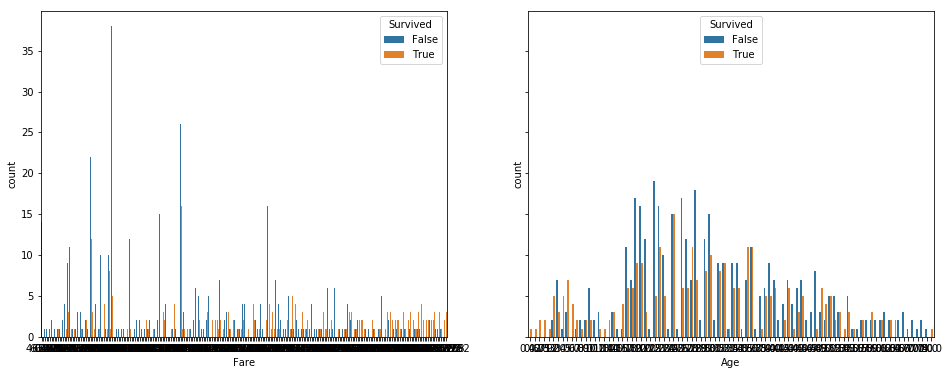

In [46]:
_, axes = plt.subplots(1, 2, sharey = True, figsize=(16,6))

sns.countplot(x = 'Fare', hue='Survived', data = df, ax=axes[0])

sns.countplot(x = 'Age', hue='Survived', data = df, ax=axes[1])

# Здесь изображены зависимости выживания в зависимости от возраста и цены билета

In [87]:
df.groupby(['Pclass'])['Survived'].agg([np.mean]).sort_values(by='mean', ascending = False).T
# Здесь указан процент выжившик в каждом классе

Pclass,1,2,3
mean,0.62963,0.472826,0.242363


In [68]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

x = df.drop(['PassengerId', 'Cabin', 'Ticket', 'Name', 'SibSp', 'Parch'], axis=1)
x['Sex'] = pd.factorize(x['Sex'])[0]
x['Embarked'] = pd.factorize(x['Embarked'])[0]
x = x.dropna() 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(x_scaled)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>